In [2]:
import sys
import numpy as np
from pathlib import Path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))
from instruments import *
from physical_models import *

[1159.5614 1199.6971 1241.2219 1284.184  1328.6331 1374.6208 1422.2002
 1471.4264 1522.3565 1575.0495 1629.5663 1685.9701 1744.3261 1804.7021
 1867.1678 1931.7956 1998.6603 2067.8395 2139.4131 2213.4641 2290.0781
 2369.3441]


In [19]:
def plot_sys_dict_vs_wavelength(component, parameter, json_dir, save_path=None, title=None, axtitle=None):
    """
    Plots a parameter in the JSON system dictionaries vs wavelength.
    Only works if all JSON dictionaries are in a directory labeled
    by bin. Sets parameters phi, delta_theta, and theta to degrees.
    Returns an array of the parameters to allow for custom plotting.
    This plot is similar to the one in van Holstein 2020.
    
    Parameters
    ----------
    component : str
        The name of the component (e.g., 'image_rotator', 'hwp', etc.).
    parameter : str
        The key of the parameter in the system dictionary.
    json_dir : str or Path
        The directory containing the JSON system dictionaries for all 22 bins.
        Make sure the directory only contains these 22 JSON files.
    save_path : str or Path, optional
        If specified, saves the plot to this path. Otherwise, displays the plot.
    title : str, optional
        Title for the plot. If not provided, a default title is used.
    axtitle : str, optional
        Title for the y-axis. If not provided, a default title is used.
    
    Returns
    -------
    parameters : np.ndarray
        An array of the parameter values extracted from the JSON files.
        To plot, plot against the default CHARIS wavelength bins (can
        be found in instruments.py).
    """

    # Check filepaths

    json_dir = Path(json_dir)
    if not json_dir.is_dir():
        raise ValueError(f"{json_dir} is not a valid directory.")
    if save_path is not None:
        save_path = Path(save_path)

    # Load JSON files

    json_files = sorted(json_dir.glob("*.json"))

    # Check for correct file amount

    if len(json_files) != 22:
        raise ValueError(f"Expected 22 JSON files, found {len(json_files)}.")
    
    # Check for bins
 
    for f in json_files:
     try:
        match = re.search(r'bin(\d+)', f.name)
        if not match:
            raise ValueError(f"File {f.name} does not match expected naming convention.")
     except Exception as e:
        raise ValueError(f"Error processing file {f.name}: {e}")
     
     # Sort Jsons

    sorted_files = sorted(json_files, key=lambda f: int(re.search(r'bin(\d+)', f.name).group(1)))

    # Extract parameters

    parameters = []

    for f in sorted_files:
        with open(f, 'r') as file:
            data = json.load(file)
            if component not in data:
                raise ValueError(f"Component '{component}' not found in {f.name}.")
            if parameter not in data[component]:
                raise ValueError(f"Parameter '{parameter}' not found in component '{component}' in {f.name}.")
            # Set relevant components to degrees
            if parameter == 'theta' or parameter == 'delta_theta' or parameter == 'phi':
                data[component][parameter] = np.degrees(data[component][parameter])
            
            parameters.append(data[component][parameter])

    # Convert to numpy array for plotting

    parameters = np.array(parameters)

    # Plot vs wavelength bins

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(wavelength_bins, parameters, marker='x')
    ax.set_xlabel('Wavelength (nm)')
    if axtitle is not None:
        ax.set_ylabel(axtitle)
    else:
        ax.set_ylabel(parameter)
    if title is None:
        ax.set_title(f'{component}: {parameter} vs wavelength')
    else:
        ax.set_title(title)
    ax.grid(True)
    if save_path is not None:
        plt.savefig(save_path)
        print(f"Plot saved to {save_path}")
    plt.show()
    return parameters
    
   

Plot saved to /Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/plotsvswavelength/lpdiattenuation_vs_wavelength_no_pick.png


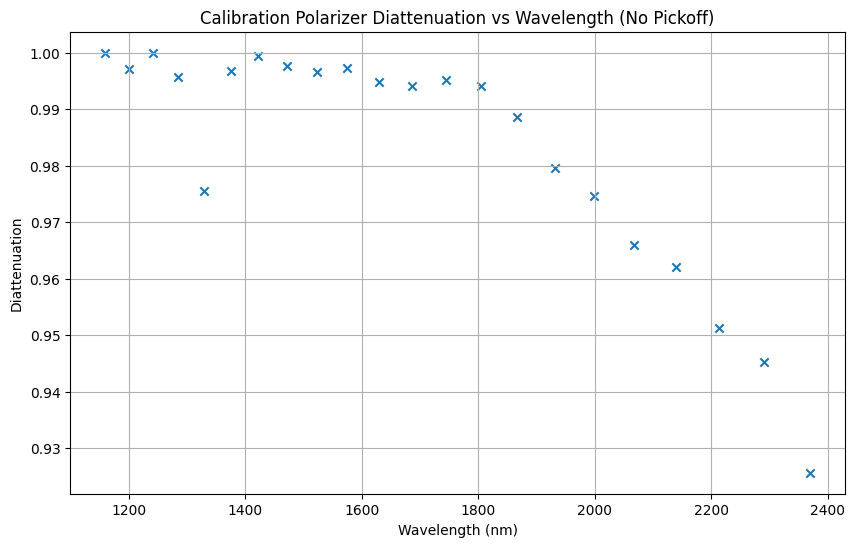

array([1.        , 0.99709503, 0.99999999, 0.99571254, 0.97556147,
       0.99682237, 0.9994478 , 0.99770519, 0.99652068, 0.99725513,
       0.99484787, 0.9941476 , 0.9951696 , 0.99416095, 0.98856916,
       0.97961264, 0.97457091, 0.96601583, 0.9620139 , 0.95121322,
       0.94526412, 0.92568841])

In [23]:
json_dir = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/system_dicts_no_pickoff_cal')
plot_path = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/plotsvswavelength/lpdiattenuation_vs_wavelength_no_pick.png')
plot_sys_dict_vs_wavelength('lp', 'epsilon',json_dir,plot_path, title= 'Calibration Polarizer Diattenuation vs Wavelength (No Pickoff)', axtitle='Diattenuation')

In [24]:
def plot_polarimetric_efficiency(json_dir, bins, save_path=None, title=None):
    """
    Plots the polarimetric efficiency from the system dictionaries vs derotator angle.
    Only works if all JSON dictionaries are in a directory labeled
    by bin. Returns an array of the polarimetric efficiency values.
    This plot is similar to the one in van Holstein 2020.
    
    Parameters
    ----------
    json_dir : str or Path
        The directory containing the JSON system dictionaries for all 22 bins.
        Make sure the directory only contains these 22 JSON files.
    bins : np.ndarray
        An array of wavelength bins to simultaneously plot.
    save_path : str or Path, optional
        If specified, saves the plot to this path. 
    title : str, optional
        Title for the plot. If not provided, a default title is used.

    Returns
    -------
    polarimetric_efficiency : np.ndarray
        A 2 dimensional array of the polarimetric efficiency values extracted from the JSON files
        where the first dimension corresponds to the wavelength bins and the second dimension represents the derotator angles.
    
    """
    # Check filepaths

    json_dir = Path(json_dir)
    if not json_dir.is_dir():
        raise ValueError(f"{json_dir} is not a valid directory.")
    if save_path is not None:
        save_path = Path(save_path)

    # Load JSON files

    json_files = sorted(json_dir.glob("*.json"))

    # Check for correct file amount

    if len(json_files) != 22:
        raise ValueError(f"Expected 22 JSON files, found {len(json_files)}.")
    
    # Check for bins
 
    for f in json_files:
     try:
        match = re.search(r'bin(\d+)', f.name)
        if not match:
            raise ValueError(f"File {f.name} does not match expected naming convention.")
     except Exception as e:
        raise ValueError(f"Error processing file {f.name}: {e}")
     
     # Sort Jsons

    sorted_files = sorted(json_files, key=lambda f: int(re.search(r'bin(\d+)', f.name).group(1)))

    # Get derotator angles

    derotator_angles = np.array([45, 57.5,70,82.5,95,107.5,120,132.5])


    # Get polarimetric efficiencies


    output = []
    for wavelength_bin in bins:
        # Create efficiency array
        efficiencies = []
        # Extract the Mueller matrix for each derotator angle
        for derotator_angle in derotator_angles:
            # Define system dictionary components for the current wavelength bin and derotator angle
            file = sorted_files[wavelength_bin]
            data = json.load(open(file, 'r'))
           # Parse the dictionary into usable values
            values, keywords = parse_configuration(data)

            # Generate system Mueller matrix

            sys_dict = {
            "components" : {
                "wollaston" : {
                "type" : "wollaston_prism_function",
                "properties" : {"beam": "o"},
                "tag": "internal",
                },
                "image_rotator" : {
                    "type" : "general_retarder_function",
                    "properties" : {"phi": 0, "theta": derotator_angle, "delta_theta": 0},
                    "tag": "internal",
                },
                "hwp" : {
                    "type" : "general_retarder_function",
                    "properties" : {"phi":0, "theta": 0, "delta_theta": 0},
                    "tag": "internal",
                },
                "lp" : {
                    "type": "general_linear_polarizer_function_with_theta",
                    "properties": {"delta_theta": 0},
                    "tag": "internal",
                }}
            }

            # generate Mueller matrix object

            system_mm = generate_system_mueller_matrix(sys_dict)

            # Update the Mueller matrix with the model

            updated_system_mm = update_system_mm(values, keywords, system_mm)

            # Calculate the polarimetric efficiency

            M_10 = updated_system_mm.evaluate()[1,0]
            M_20 = updated_system_mm.evaluate()[2,0]
            M_00 = updated_system_mm.evaluate()[0,0]
            efficiency = np.sqrt(M_10**2 + M_20**2) / M_00
            efficiencies.append(efficiency)
        output.append(efficiencies)

    pol_efficiencies = np.array(output)

    # Plot vs derotator angle

    fig, ax = plt.subplots(figsize=(10, 6))
    for i, wavelength_bin in enumerate(bins):
        ax.plot(derotator_angles, pol_efficiencies[i], label=f"{wavelength_bins[wavelength_bin]} nm")
    ax.set_xlabel('Derotator Angle (degrees)')
    ax.set_ylabel('Polarimetric Efficiency')
    if title is None:
        ax.set_title('Polarimetric Efficiency vs Derotator Angle')
    else:
        ax.set_title(title)
    ax.grid(True)
    ax.legend()
    if save_path is not None:
        plt.savefig(save_path)
        print(f"Plot saved to {save_path}")
    plt.show()
    return pol_efficiencies





          
                

            
                    



        

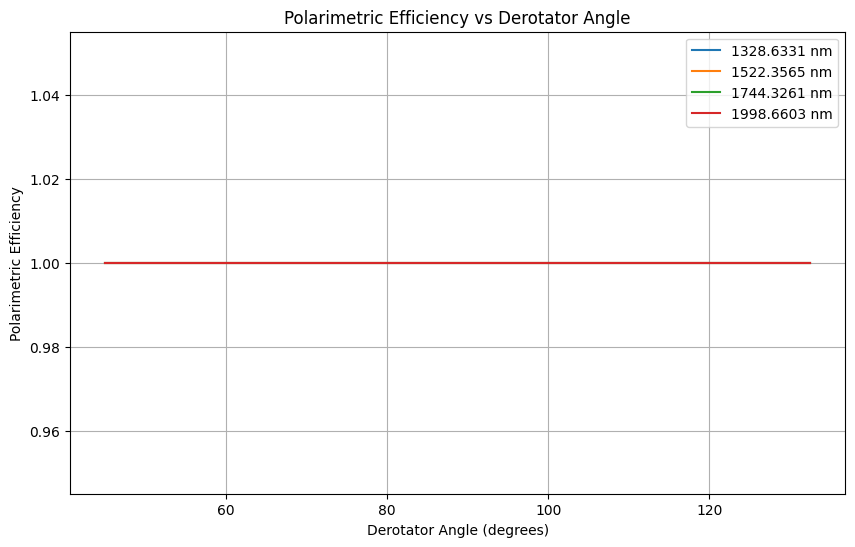

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [25]:
bins = [4,8,12,16]
json_dir = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/system_dicts_no_pickoff')
plot_polarimetric_efficiency(json_dir,bins)

In [48]:
json_dir = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/system_dicts_no_pickoff')
json_files = sorted(json_dir.glob("*.json"))
sorted_files = sorted(json_files, key=lambda f: int(re.search(r'bin(\d+)', f.name).group(1)))
file = sorted_files[4]
data = json.load(open(file, 'r'))
# Parse the dictionary into usable values
values, keywords = parse_configuration(data)
sys_dict = {
"components" : {
"wollaston" : {
"type" : "wollaston_prism_function",
"properties" : {"beam": "o"},
"tag": "internal",
},
"image_rotator" : {
"type" : "general_retarder_function",
"properties" : {"phi": 4.3, "theta": 22.5, "delta_theta": 0},
"tag": "internal",
},
"hwp" : {
"type" : "general_retarder_function",
"properties" : {"phi":3.02, "theta": 12.5, "delta_theta": 0},
"tag": "internal",
},
"lp" : {
"type": "general_linear_polarizer_function_with_theta",
"properties": {"delta_theta": 0},
"tag": "internal",
}}
}

# generate Mueller matrix object

system_mm = generate_system_mueller_matrix(sys_dict)
# update_system_mm(values, keywords, system_mm)
print(system_mm.evaluate())


[[0.44018478 0.44018478 0.         0.        ]
 [0.44018478 0.44018478 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]


In [ ]:
sys_dict = {
    "components" : {
        "wollaston" : {
        "type" : "wollaston_prism_function",
        "properties" : {"beam": "o"},
        "tag": "internal",
        },
        "image_rotator" : {
            "type" : "general_retarder_function",
            "properties" : {"phi": 0, "theta": derotator_angle, "delta_theta": 0},
            "tag": "internal",
        },
        "hwp" : {
            "type" : "general_retarder_function",
            "properties" : {"phi":0, "theta": 0, "delta_theta": 0},
            "tag": "internal",
        },
        "lp" : {
            "type": "general_linear_polarizer_function_with_theta",
            "properties": {"delta_theta": 0},
            "tag": "internal",
        }}
    }

# generate Mueller matrix object

system_mm = generate_system_mueller_matrix(sys_dict)

# Update the Mueller matrix with the model

update_system_mm(values, keywords, system_mm)